# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Reinforcement%20Learning/Ads_CTR_Optimisation.csv

--2021-09-26 08:44:58--  https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Reinforcement%20Learning/Ads_CTR_Optimisation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200050 (195K) [text/plain]
Saving to: ‘Ads_CTR_Optimisation.csv’

Ads_CTR_Optimisatio 100%[===================>] 195.36K  --.-KB/s    in 0.02s   

2021-09-26 08:44:59 (10.5 MB/s) - ‘Ads_CTR_Optimisation.csv’ saved [200050/200050]



## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

This dataset is the simulation of the ads campain.

One row represent one user, each time user login the website, an ad will show up. We'll record if the user click yes on that ad.
* We have 10 ads.
* We have 10000 users.

For the algorithms more robust, we assumpt that the reward when user click on an ad is > 0. In the case of the multi-armed bandit problem, the reward of each machine maybe differents.

In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## The UCB Algorithm
<div>
<img src="https://i.ibb.co/H7HJRMw/UCB-Algorithm-Slide.png" alt="UCB-Algorithm-Slide" border="0">
<div>


## Implementing the UCB Algorithm

Background story:
Each time user connects to the web page, that makes one round (in the dataset each round is represented by a row)

For each row, only one ad is chosed to display to the user.
If the ad is clicked, reward is given ie. `1` else `0`.

* `if (numbers_of_selections[i] > 0)` : Only ad that is displayed to the user  at least once is allowed to enter the main algorithm

* What about those ad that has yet to be displayed?
By taking the variable `upper_bound` to a huge number (`1e400`), it forces the ad to be selected at least once.

* `upper_bound = average_reward + delta_i`
This is the crucial code cz it is the upper bound that determines which ad to be added to the `ads_selected` list based on `average reward` & `delta i`.

* And this `ads_selected` is used later to construct `histogram` where the `frequency` of the ads is plotted against each ad.

In [ ]:
import math
N = 10000 # number of users
d = 10 # number of ads
ads_selected = [] # use to append the different types of ads selected in each round
Ni = numbers_of_selections = [0]*d # number of selections, use to count number of time an ad is selected
Ri = sums_of_rewards =  [0]*d # Sum of rewards, use to calculating the cumulative sum of rewards each row
total_rewards = 0
for n in range(N): # Loop through 10000 users
  ad = 0 # store the index of the ad with the max upper bound 
  max_upper_bound = 0
  for i in range(d): # Loop through 10 ads
    if numbers_of_selections[i]>0: # check if ads is have been selected before
      average_reward = sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else: # if the ads isn't selected yet
      upper_bound = 1e400 
    if upper_bound>max_upper_bound:
      max_upper_bound=upper_bound
      ad = i
  # update variables
  ads_selected.append(ad)
  numbers_of_selections[ad] +=1
  reward = dataset.values[n, ad] # because the reward > 0
  sums_of_rewards[ad] += reward
  total_rewards += reward

In [10]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [1]*d # this time, we initalied that every single ads has been selected
sums_of_rewards = [0]*d
total_rewards = 0
for n in range(N): # Loop through 10000 users
  ad = 0
  max_upper_bound = 0
  for i in range(d):
    if numbers_of_selections[i]>0:
      average_reward = sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  # update variables
  ads_selected.append(ad)
  numbers_of_selections[ad] +=1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] += reward
  total_rewards += reward

## Visualizing the results

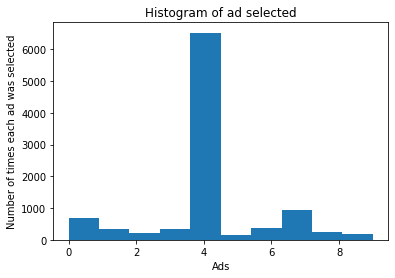

In [11]:
plt.hist(ads_selected)
plt.title("Histogram of ad selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()

What if we just count numbers of times an ad is selected?

Well, although we know that 4 is the most selected ad but we lose the statiscal information behind, like the distribution, the rewards, etc.

(array([1703., 1295.,  728., 1196., 2695.,  126., 1112., 2091.,  952.,
         489.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

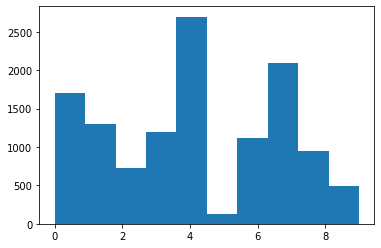

In [ ]:
N = 10000 # number of users
d = 10 # number of ads
rs = []
for n in range(N): # Loop through 10000 users
  for i in range(d): # Loop through 10 ads
     if dataset.values[n, i]>0:
       rs.append(i)# check if ads is have been selected before
plt.hist(rs)